In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import pandas as pd 

In [14]:
%matplotlib notebook

In [16]:
def smooth(scalars, weight=0.6):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

In [38]:
def plot_scalar(scalar, smoothing=0.6, index=0):
    smoothed = smooth(scalar, smoothing)
    index = str(index)
    plt.plot(scalar, 'C' + index, label=index)
    plt.plot(smoothed, 'C' + index, alpha=0.3)
    plt.legend()

In [32]:
def plot_scalars(scalars, smoothing=0.6):
    for i, scalar in enumerate(scalars):
        plot_scalar(scalar, index=i)

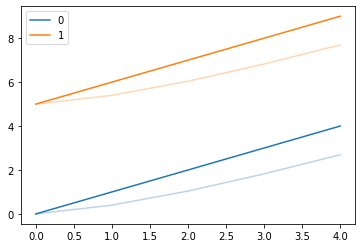

In [41]:
scalar = [0,1,2,3,4]
scalar_2 = [5, 6, 7, 8 ,9]

scalars = [scalar, scalar_2]

# plot_scalar(scalar)

plot_scalars(scalars)

<IPython.core.display.Javascript object>


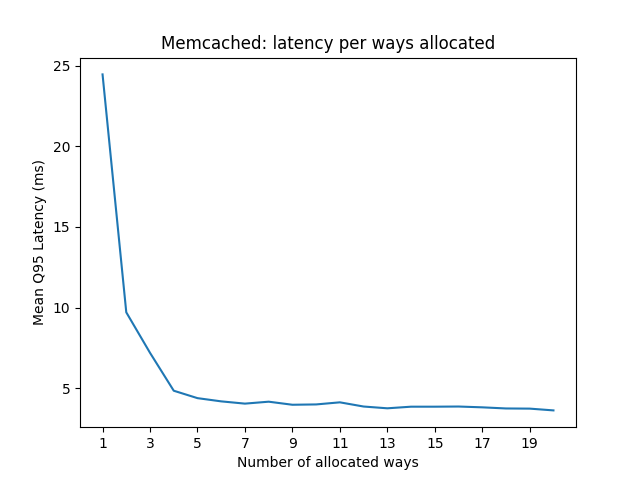

Text(0.5, 1.0, 'Memcached: latency per ways allocated')

In [54]:
mean_latency = [24.46, 9.71, 7.2, 4.85, 4.39, 4.19, 4.05, 4.17, 3.98, 4, 4.13, 3.87, 3.76, 3.86, 3.86, 3.87, 3.82, 3.75, 3.74, 3.63]
ways = list(range(1, 21))

plt.plot(ways, mean_latency)
plt.xticks(np.arange(min(ways), max(ways)+1, 2))
plt.xlabel("Number of allocated ways")
plt.ylabel("Mean Q95 Latency (ms)")
plt.title("Memcached: latency per ways allocated")

In [218]:
def read_data(pwd, smoothing=0.6, action=False, index='Step'):
    dataframes = []
    for root,dirs,files in os.walk(pwd):
        my_files = files.sort()
        for i, file in enumerate(files):
            print(file)
            if file.endswith(".csv"):
                data = pd.read_csv(pwd+file)[[index, 'Value']]
                data['Tag'] = i
                if action:
                    data['Value'] = data['Value'] + 1
                df = data.pivot(index=index, columns='Tag', values=['Value'])
                smoothed = df.ewm(alpha=(1 - smoothing)).mean()
                dataframes.append(smoothed)   

    df_all = pd.concat(dataframes)      


    # df['Smoothed'] = smooth(df['Value'].tolist(), weight=smoothing)
    # df_values = df.pivot(index='Step', columns='Tag', values='Value')
    # df_values.plot(alpha=0.3)


    #smoothed[df.isnull()] = np.nan
    return df_all

run-Aug21_23-02-22_broady3_in-memory_MPKI-tag-Agent_Action.csv
run-Aug22_01-04-13_broady3_in-memory_IPC-tag-Agent_Action.csv
run-Aug22_02-36-52_broady3_in-memory_Bandwidth-tag-Agent_Action.csv
run-Aug22_17-07-21_broady3_in-memory_50ms_0.001decay-tag-Agent_Action.csv


<IPython.core.display.Javascript object>


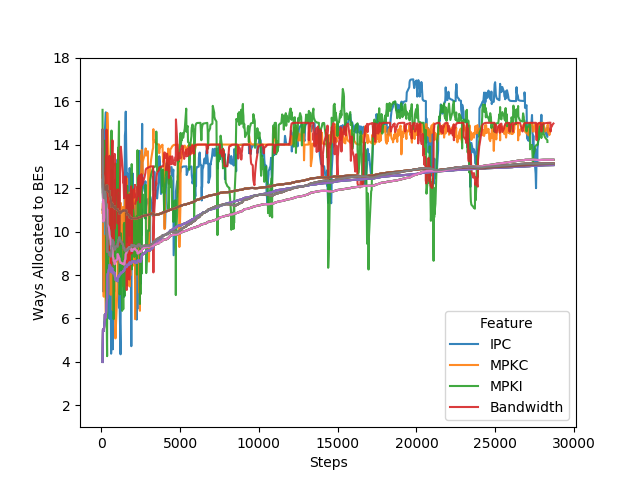

In [122]:
pwd = "/home/nikmand/Downloads/thesis_runs_data/study_feature/"

df = read_data(pwd, action=True)

ax = df.plot(alpha=0.9)
plt.xlabel("Steps")
plt.ylabel("Ways Allocated to BEs")
#plt.title("Memcached: latency per ways allocated")
ax.set_ylim([1,18])
ax.legend(["IPC", "MPKC", "MPKI", "Bandwidth"], title='Feature')

run-Aug24_15-16-48_broady3_graphs_q.99_coeff4-tag-Agent_Action.csv
run-Aug24_16-15-58_broady3_graphs_q.99-tag-Agent_Action.csv
run-Aug24_17-29-37_broady3_graphs_50ms_0.001decay-tag-Agent_Action.csv
run-Aug24_18-33-59_broady3_graphs_q.90-tag-Agent_Action.csv


<IPython.core.display.Javascript object>


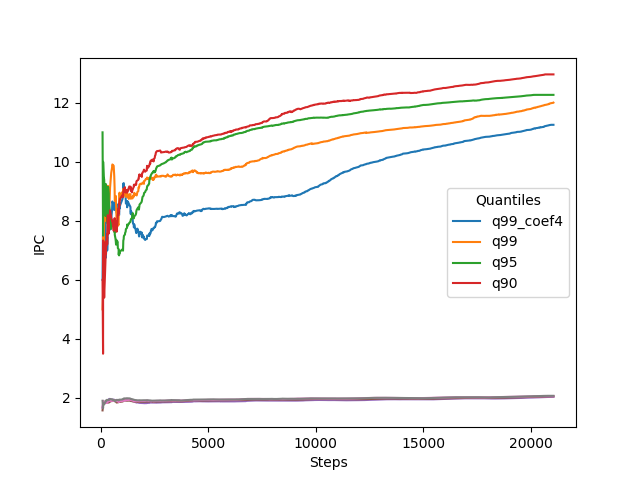

In [160]:
pwd = "/home/nikmand/Downloads/thesis_runs_data/study_quantile/graphs_action_comparison/"

smoothed = read_data(pwd, 0.999, action=True)

plt.subplot(1,1,1)
plt.plot(smoothed)
plt.xlabel("Steps")
plt.ylabel("Ways Allocated to BEs")
#plt.title("Memcached: latency per ways allocated")
# ax.set_ylim([1,18])
plt.legend(["q99_coef4", "q99", "q95", "q90"], title='Quantiles')
plt.show()

run-Aug24_15-16-48_broady3_graphs_q.99_coeff4-tag-Best Effort_IPC.csv
run-Aug24_16-15-58_broady3_graphs_q.99-tag-Best Effort_IPC.csv
run-Aug24_17-29-37_broady3_graphs_50ms_0.001decay-tag-Best Effort_IPC.csv
run-Aug24_18-33-59_broady3_graphs_q.90-tag-Best Effort_IPC.csv


<IPython.core.display.Javascript object>


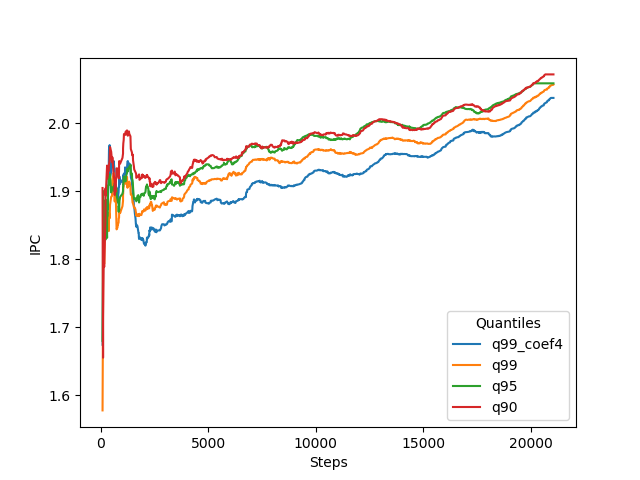

In [212]:
pwd = "/home/nikmand/Downloads/thesis_runs_data/study_quantile/graphs_ipc_comparison/"

smoothed = read_data(pwd, 0.999)

plt.subplot(1,1,1)
plt.plot(smoothed)
plt.xlabel("Steps")
plt.ylabel("IPC")
#plt.title("Memcached: latency per ways allocated")
#ax.set_ylim([1,2.5])
plt.legend(["q99_coef4", "q99", "q95", "q90"], title='Quantiles')
plt.show()

.~lock.run-Aug23_08-21-46_broady3_measurement_action_-1_graphs-tag-Latency Critical_Latency.csv#
run-Aug22_16-29-37_broady3_graphs_50ms_0.001decay-tag-Latency Critical_Latency.csv
run-Aug23_08-21-46_broady3_measurement_action_-1_graphs-tag-Latency Critical_Latency.csv


<IPython.core.display.Javascript object>


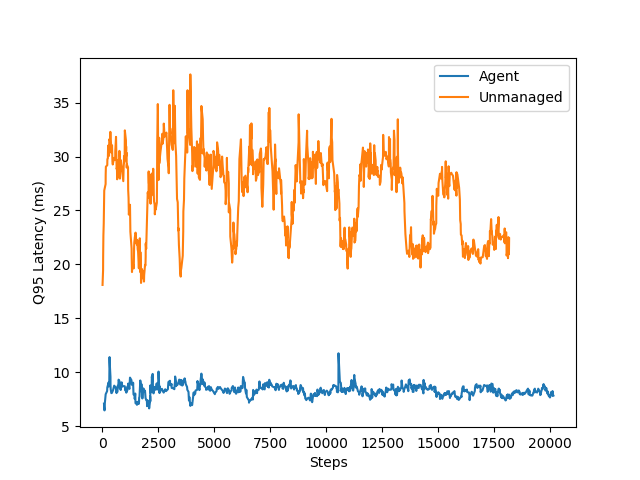

In [234]:
pwd = "/home/nikmand/Downloads/thesis_runs_data/study_coex/agent_vs_unmanaged_graphs/"

smoothed = read_data(pwd, 0.6, index='Step')

plt.subplot(1,1,1)
plt.plot(smoothed)
plt.xlabel("Steps")
plt.ylabel("Q95 Latency (ms)")
#plt.title("Memcached: latency per ways allocated")
#ax.set_ylim([1,2.5])
plt.legend(["Agent", "Unmanaged"])
plt.show()

run-Aug23_09-23-29_broady3_GradientBoostedTreeRegressor-tag-Latency Critical_Latency.csv
run-Aug23_10-11-29_broady3_measurement_action_-1_GradientBoostedTreeRegressor-tag-Latency Critical_Latency.csv


<IPython.core.display.Javascript object>


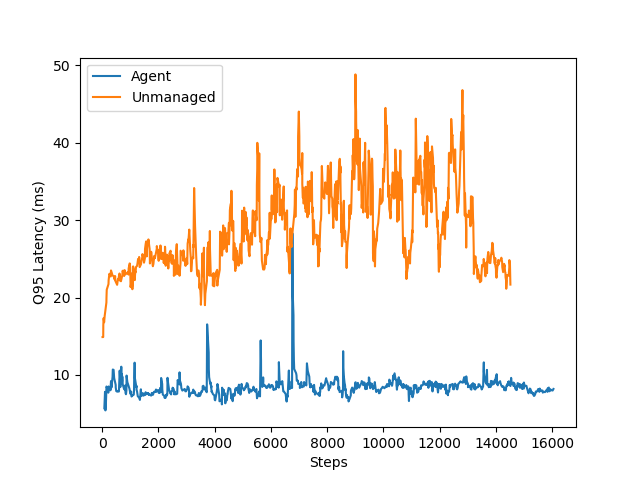

In [235]:
pwd = "/home/nikmand/Downloads/thesis_runs_data/study_coex/agent_vs_unmanaged_gb/"

smoothed = read_data(pwd, 0.6)

plt.subplot(1,1,1)
plt.plot(smoothed)
plt.xlabel("Steps")
plt.ylabel("Q95 Latency (ms)")
#plt.title("Memcached: latency per ways allocated")
#ax.set_ylim([1,2.5])
#plt.hlines(10, 0, 16000, color='r')
#plt.axhline(10,  color='r')
plt.legend(["Agent", "Unmanaged"])
plt.show()

run-Aug23_08-21-46_broady3_measurement_action_-1_graphs-tag-Latency Critical_Bandwidth L..csv
run-Aug23_08-58-07_broady3_measurement_action_-1_in-memory-tag-Latency Critical_Bandwidth L..csv


<IPython.core.display.Javascript object>


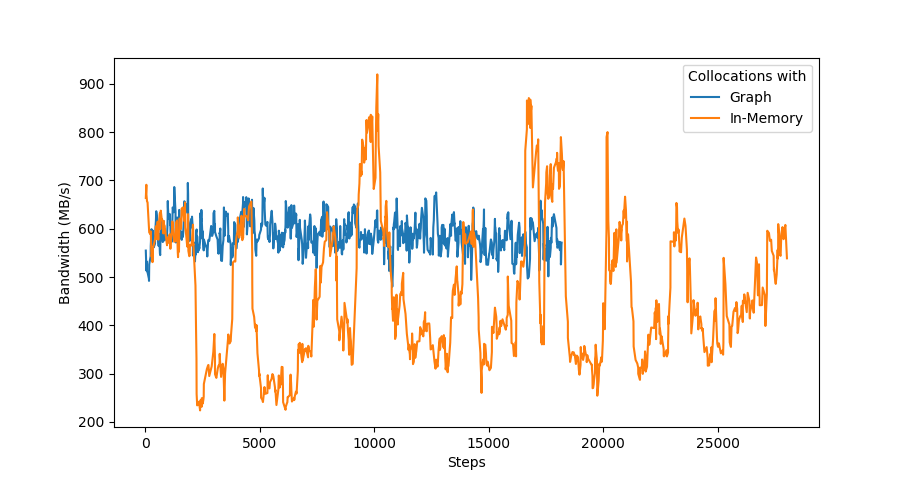

In [240]:
pwd = "/home/nikmand/Downloads/thesis_runs_data/study_coex/bandwidth_-1_for_graphs_in-memory/"


smoothed = read_data(pwd, 0.6)

plt.subplot(1,1,1)
plt.plot(smoothed)
plt.xlabel("Steps")
plt.ylabel("Bandwidth (MB/s)")
#plt.title("Memcached: latency per ways allocated")
#ax.set_ylim([1,2.5])
#plt.hlines(10, 0, 16000, color='r')
#plt.axhline(10,  color='r')
plt.legend(["Graph", "In-Memory"], title='Collocations with')
plt.show()